Confusion Matrix:
[[1208 1292]
 [ 888 1612]]


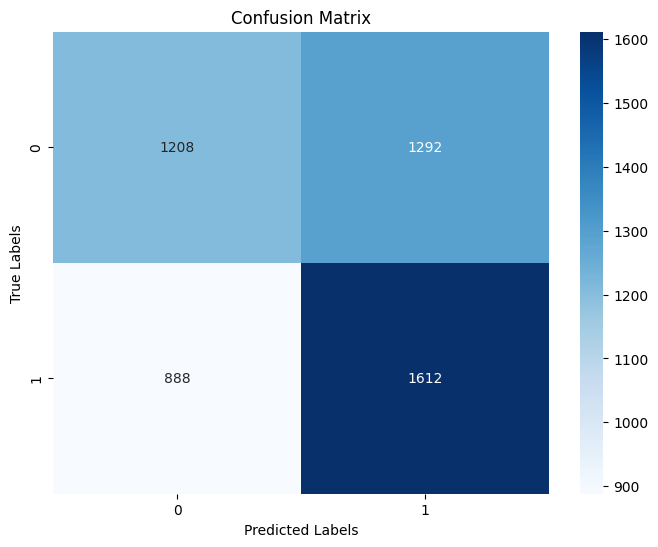

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.48      0.53      2500
           1       0.56      0.64      0.60      2500

    accuracy                           0.56      5000
   macro avg       0.57      0.56      0.56      5000
weighted avg       0.57      0.56      0.56      5000



In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust file paths to be what do you have
train_file_path = "./datasets/subtaskA_train_monolingual.jsonl"
test_file_path = "./datasets/subtaskA_dev_monolingual.jsonl"
#validation_file_path = r"C:\Users\IzzCoin\Desktop\Uni\CS4765\Model\ModelData\validation.jsonl"

# Load raw datasets
train_dataset = load_dataset('json', data_files=train_file_path)
validation_dataset = load_dataset('json', data_files=test_file_path)

# Extract the 'text' and 'label' columns from the loaded datasets
train_texts = train_dataset["train"]["text"]
train_labels = train_dataset["train"]["label"]
validation_texts = validation_dataset["train"]["text"]
validation_labels = validation_dataset["train"]["label"]

# Tokenize the dataset using the custom tokenizer
count_vectorizer = CountVectorizer()
train_counts = count_vectorizer.fit_transform(train_texts)
validation_counts = count_vectorizer.transform(validation_texts)

# Optional: Scale the data (StandardScaler)
scaler = StandardScaler(with_mean=False)
train_counts_scaled = scaler.fit_transform(train_counts)
validation_counts_scaled = scaler.transform(validation_counts)

# Train the model
lr = LogisticRegression(solver='sag', penalty='l2', max_iter=20000, random_state=0)
lr_classifier = lr.fit(train_counts_scaled, train_labels)

# Generate predictions on the validation set
validation_predictions = lr_classifier.predict(validation_counts_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(validation_labels, validation_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=lr_classifier.classes_, 
    yticklabels=lr_classifier.classes_
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_report = classification_report(validation_labels, validation_predictions, zero_division=0)
print("Classification Report:")
print(class_report)
